## Predict salary of employee based on position

In [2]:
#Import the library and get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
salary = pd.read_csv("salary_prediction.csv")
salary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-Level,9,500000
9,CEO,10,1000000


In [5]:
X = salary.iloc[:, 1:2].values
y = salary.iloc[:, 2].values
y

array([['Business Analyst', 1, 45000],
       ['Junior Consultant', 2, 50000],
       ['Senior Consultant', 3, 60000],
       ['Manager', 4, 80000],
       ['Country Manager ', 5, 110000],
       ['Region Manager ', 6, 150000],
       ['Partner', 7, 200000],
       ['Senior Partner ', 8, 300000],
       ['C-Level', 9, 500000],
       ['CEO', 10, 1000000]], dtype=object)

In [5]:
# As the dataset is very small we won’t perform any splitting. We will proceed directly to fitting the data
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [16]:
# Now we will predict the salary of a person who has a level of 8
level = int(input("Enter the level of employee: "))
level_pred = model.predict([[level]])
level_pred

Enter the level of employee: 6


array([136000.])

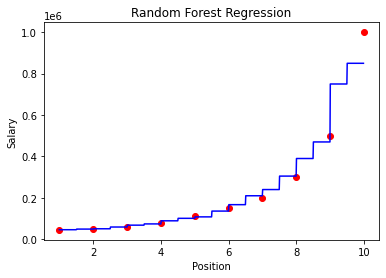

In [17]:
# After prediction, we can see that the employee must get a salary of 167000 after reaching a level of 8. Let us visualise to interpret it in a better way.

X_grid_data = np.arange(min(X), max(X), 0.01)
X_grid_data = X_grid_data.reshape((len(X_grid_data), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid_data,model.predict(X_grid_data), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()